Test size: 0.30 | Train Accuracy: 1.0000 | Test Accuracy: 0.9111
Test size: 0.31 | Train Accuracy: 1.0000 | Test Accuracy: 0.9149
Test size: 0.32 | Train Accuracy: 1.0000 | Test Accuracy: 0.9167
Test size: 0.33 | Train Accuracy: 1.0000 | Test Accuracy: 0.9000
Test size: 0.34 | Train Accuracy: 1.0000 | Test Accuracy: 0.9020
Test size: 0.35 | Train Accuracy: 1.0000 | Test Accuracy: 0.9057
Test size: 0.36 | Train Accuracy: 1.0000 | Test Accuracy: 0.9074
Test size: 0.37 | Train Accuracy: 1.0000 | Test Accuracy: 0.9107
Test size: 0.38 | Train Accuracy: 1.0000 | Test Accuracy: 0.9123
Test size: 0.39 | Train Accuracy: 1.0000 | Test Accuracy: 0.9153
Test size: 0.40 | Train Accuracy: 1.0000 | Test Accuracy: 0.9167
Test size: 0.41 | Train Accuracy: 1.0000 | Test Accuracy: 0.9194
Test size: 0.42 | Train Accuracy: 1.0000 | Test Accuracy: 0.9206
Test size: 0.43 | Train Accuracy: 1.0000 | Test Accuracy: 0.9231
Test size: 0.44 | Train Accuracy: 1.0000 | Test Accuracy: 0.9242
Test size: 0.45 | Train A

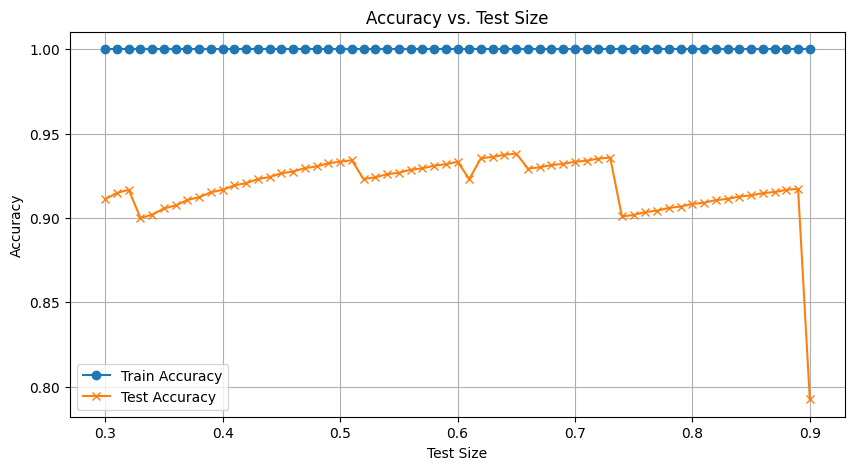

In [5]:
# 导入相关库
from sklearn.ensemble import RandomForestRegressor  # 导入随机森林回归器
from sklearn.linear_model import LinearRegression  # 导入线性回归模型
from sklearn.model_selection import KFold, cross_val_score, train_test_split as TTS # 导入交叉验证、交叉验证评分及数据集划分
from sklearn.metrics import mean_squared_error, accuracy_score  # 导入均方误差计算的方法及准确度计算方法
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

import pandas as pd  # 导入处理数据的pandas库
import numpy as np  # 导入数值计算库Numpy
import matplotlib.pyplot as plt  # 导入绘图库matplotlib
from time import time  # 导入时间模块中的time函数
import datetime  # 导入日期时间模块


# 读取文件
file_path = "D:\data\iris\iris.data"
data = pd.read_csv(file_path, delimiter=',')

# 替换'MissingValue'为NaN
data.replace('?', np.nan, inplace=True)


# 设置特征和标签
X = data.iloc[:, :4]  # 前4列特征
lable = data.iloc[:, 4]   # 第5列标签

#转换标签
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(lable)

# 定义XGBoost参数
params = {
    'objective': 'multi:softmax',  # 适用于多分类问题
    'num_class': len(label_encoder.classes_), # 类别数量
    'eval_metric': 'mlogloss'  # 使用多分类交叉熵损失
}

num_round = 100

# 测试不同的test_size
test_sizes = np.arange(0.3, 0.9, 0.01)
best_train_accuracy = 0
best_test_accuracy = 0
best_test_size = 0
train_accuracies = []
test_accuracies = []

for test_size in test_sizes:
    # 随机分割训练数据集和测试数据集
    X_train, X_test, y_train, y_test = TTS(X, y, test_size=test_size, random_state=42)

    # 转换为DMatrix，XGBoost的专用数据结构
    dtrain = xgb.DMatrix(X_train, label=y_train, missing=np.nan)
    dtest = xgb.DMatrix(X_test, label=y_test, missing=np.nan)

    # 训练模型
    bst = xgb.train(params, dtrain, num_round)
    
    # 预测
    y_train_pred = bst.predict(dtrain)
    y_test_pred = bst.predict(dtest)
    
    # 计算准确度
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    if test_accuracy > best_test_accuracy:
        best_test_accuracy = test_accuracy
        best_test_size = test_size

# 输出结果
# for i, test_size in enumerate(test_sizes):
#     print(f'Test size: {test_size:.2f} | Train Accuracy: {train_accuracies[i]:.4f} | Test Accuracy: {test_accuracies[i]:.4f}')

print(f'best_test_size:{best_test_size:.2f} | best_test_accuracy:{best_test_accuracy:.2f}')

# 绘制训练准确度和测试准确度随test_size变化的图像
plt.figure(figsize=(10, 5))
plt.plot(test_sizes, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(test_sizes, test_accuracies, label='Test Accuracy', marker='x')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Test Size')
plt.legend()
plt.grid(True)
plt.show()